In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io as sio
import h5py
import scipy.signal as scisig
import importlib
import analysis_utils as au
import cmath

In [2]:
filename = r'D:\Lab Data\lorentz_force\sphere20250507\20250528\2.5 V\pos0 10\tt0.hdf5'
data, attrs = au.load_data_lf(filename)
PSD = scisig.welch(data['channel_d'][:10**7], fs = 1/attrs['delta_t'], nperseg = int(1/attrs['delta_t']))
fft = np.fft.fft(data['channel_d'][:10**5])

In [3]:
cal = 10**(-15)*0.75 # Matching to Yu-Han's calibration
print(np.sqrt(PSD[1][5500]*cal)/np.abs(fft[5500]))
cal2 = np.sqrt(PSD[1][5500]*cal)/np.abs(fft[5500])
print(np.abs(fft[5500]) * cal2)

1.2757787734303081e-14
5.332184232222717e-13


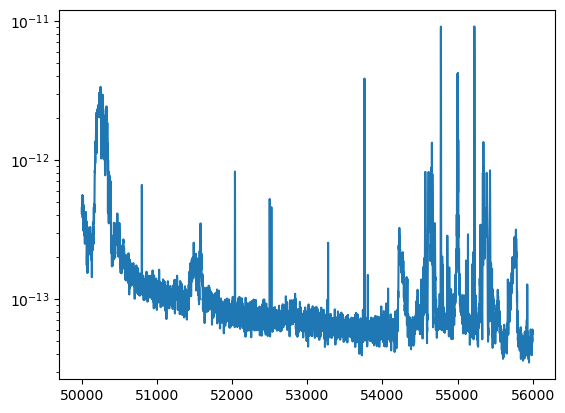

In [4]:
lb = 50000
ub = 56000
plt.plot(PSD[0][lb:ub], np.sqrt(PSD[1][lb:ub]*cal))
#plt.plot(PSD[0][lb:ub], np.abs(fft[lb:ub])*cal2)
plt.yscale('log')

In [5]:
freqs = [5500]
numfiles = 10
int_n = 10**5
file_n = 10**7
samples_per_file = int(file_n/int_n)
positions = [0, 1, 2]
cycles = np.linspace(0, 9, 10, dtype = int)
directions = [1, 2]

phases_pos = np.zeros((len(cycles), len(directions), len(positions), len(freqs), int(numfiles*samples_per_file)))
amps_pos = np.zeros((len(cycles), len(directions), len(positions), len(freqs), int(numfiles*samples_per_file)))
cfs_pos = np.zeros((len(cycles), len(directions), len(positions), len(freqs), int(numfiles*samples_per_file)))

for cycle in cycles:
    for direction in directions:
        for position in positions:
            path = r'D:\Lab Data\lorentz_force\sphere20250507\20250528\2.5 V\pos'+str(position)+' '+str(direction)+str(cycle)+r'\tt'
            files = np.linspace(0, numfiles-1, numfiles, dtype = int)
            end = '.hdf5'
            phases2 = np.zeros((len(freqs), int(numfiles*samples_per_file)))
            amps2 = np.zeros((len(freqs), int(numfiles*samples_per_file)))
            cf2 = np.zeros((len(freqs), int(numfiles*samples_per_file)))
            for n, file in enumerate(files):
                filename = path + str(file) + end
                data, attrs = au.load_data_lf(filename)
                for i in range(samples_per_file):
                    drive = data['channel_f'][i*int_n:(i+1)*int_n]
                    drive2 = data['channel_d'][i*int_n:(i+1)*int_n]
                    fft_drive = np.fft.rfft(drive)
                    fft_drive2 = np.fft.rfft(drive2)
                    for m, freq in enumerate(freqs):
                        phase = np.unwrap([-np.pi, cmath.phase(fft_drive[freq])-cmath.phase(fft_drive2[freq])])
                        amp = np.abs(fft_drive2[freq])/np.abs(fft_drive[freq])
                        cf = np.argmax(np.abs(fft_drive2[4800:5200]))*10+48000
                        amps2[m, samples_per_file*n+i] = amp
                        phases2[m, samples_per_file*n+i] = phase[1]
                        cf2[m, samples_per_file*n+i] = cf
            phases_pos[cycle, direction-1, position] = phases2
            amps_pos[cycle, direction-1, position] = amps2
            cfs_pos[cycle, direction-1, position] = cf2

In [6]:
data_dict = {'amps': amps_pos, 'phases': phases_pos, 'cfs': cfs_pos}
filename = r'C:\Users\thoma\Documents\SIMPLE\Data\Lab data\Lorentz force\Magsweep250528.hdf5'
au.save_data_hdf5(filename, data_dict)

In [25]:
filename = r'C:\Users\thoma\Documents\SIMPLE\Data\Lab data\Lorentz force\Magsweep250528.hdf5'
data = au.load_data_hdf52(filename)
amps_pos = data['amps']
phases_pos = data['phases']
cfs_pos = data['cfs']

In [26]:
cal = 10**(-15)*0.75 # Matching to Yu-Han's calibration
cal3 = 3.1825020700030454e-10
print(amps_pos[0,0,0,0,0]*cal3)

4.200202433296996e-12


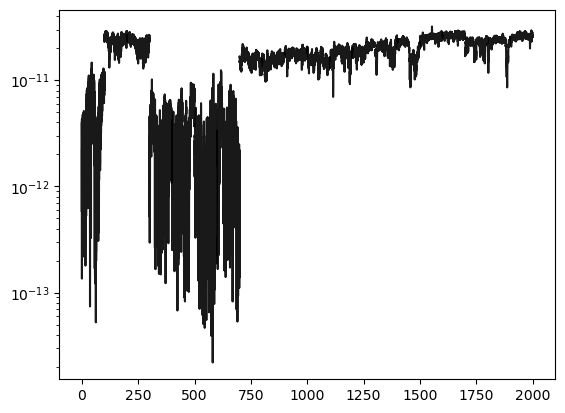

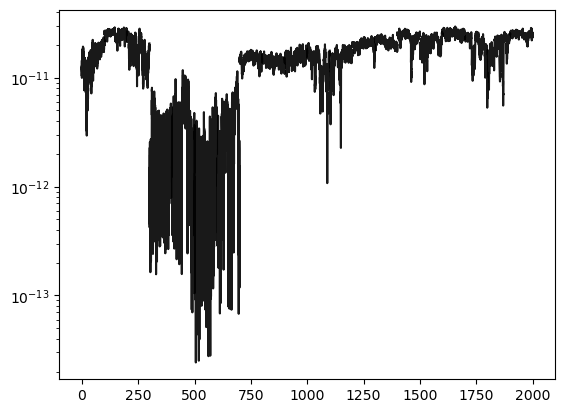

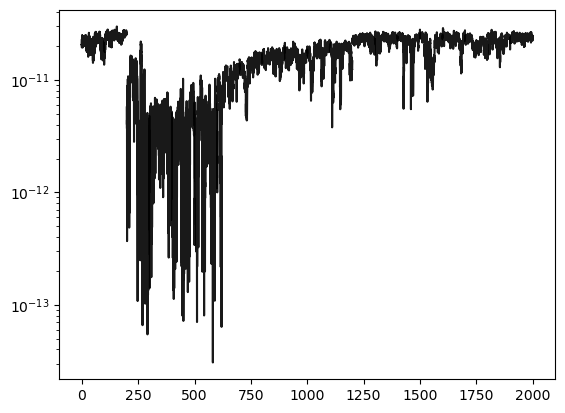

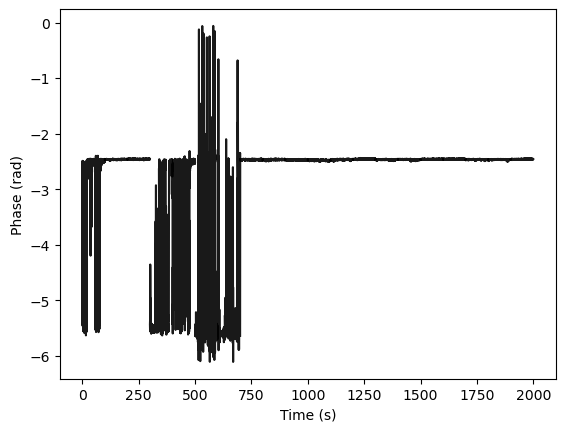

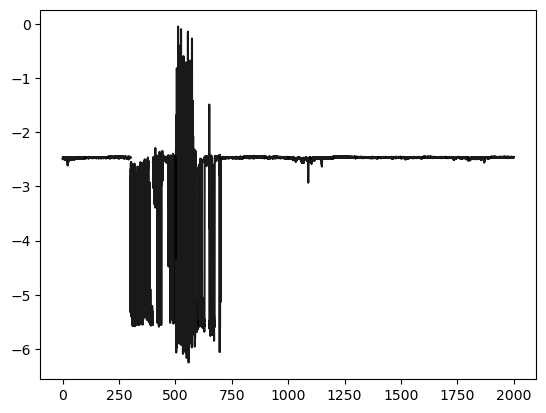

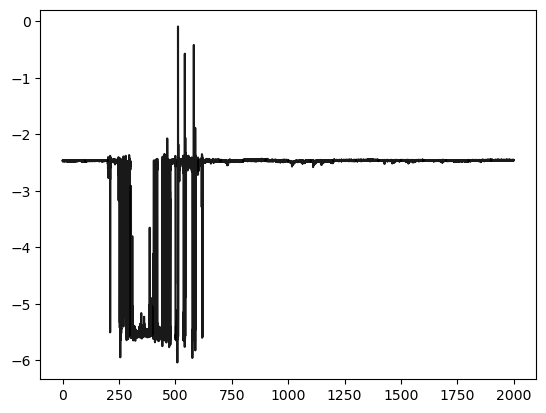

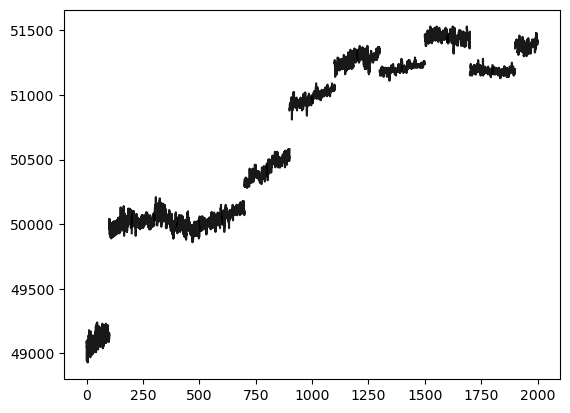

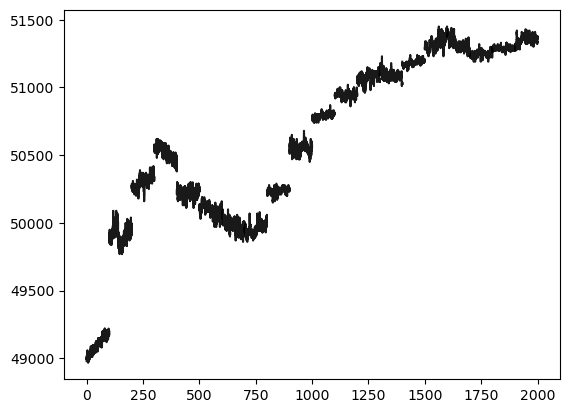

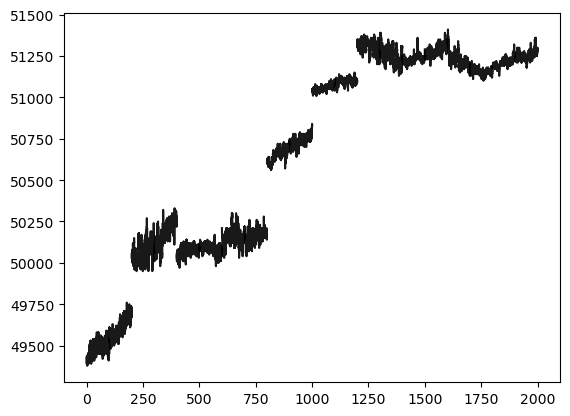

In [8]:
for m, i in enumerate(amps_pos[:,:, 0, 0].reshape((20, 1000))[:]):
    plt.plot(np.linspace(0, 99.9, 1000)+100*m, i*cal3, 'k', alpha = 0.9)
plt.yscale('log')
plt.figure()
for m, i in enumerate(amps_pos[:,:, 1, 0].reshape((20, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i*cal3, 'k', alpha = 0.9)
plt.yscale('log')
plt.figure()
for m, i in enumerate(amps_pos[:,:, 2, 0].reshape((20, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i*cal3, 'k', alpha = 0.9)
plt.yscale('log')

plt.figure()
for m, i in enumerate(phases_pos[:,:, 0, 0].reshape((20, 1000)[:])):
    plt.plot(np.linspace(0, 99.9, 1000)+100*m, i, 'k', alpha = 0.9)
plt.ylabel('Phase (rad)')
plt.xlabel('Time (s)')
plt.figure()
for m, i in enumerate(phases_pos[:,:, 1, 0].reshape((20, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i, 'k', alpha = 0.9)
plt.figure()
for m, i in enumerate(phases_pos[:,:, 2, 0].reshape((20, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i, 'k', alpha = 0.9)

plt.figure()
for m, i in enumerate(cfs_pos[:,:, 0, 0].reshape((20, 1000)[:])):
    plt.plot(np.linspace(0, 99.9, 1000)+100*m, i, 'k', alpha = 0.9)
plt.figure()
for m, i in enumerate(cfs_pos[:,:, 1, 0].reshape((20, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i, 'k', alpha = 0.9)
plt.figure()
for m, i in enumerate(cfs_pos[:,:, 2, 0].reshape((20, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i, 'k', alpha = 0.9)


Text(0.5, 0, 'Time (s)')

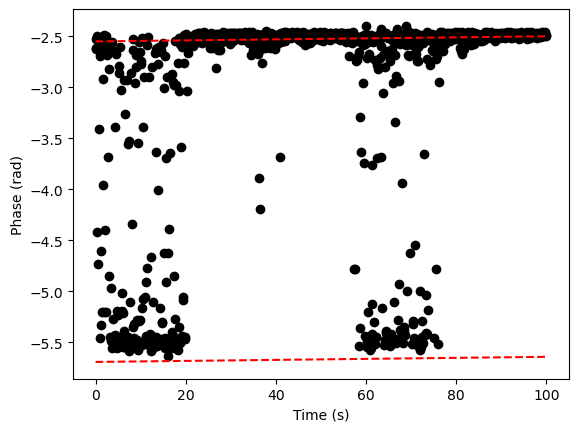

In [52]:
plt.figure()
plt.plot(np.linspace(0, 99.9, 1000), phases_pos[:,:, 0, 0].reshape((20, 1000)[:])[0], 'ko')
plt.plot([0, 100], [-2.55, -2.5], 'r--')
plt.plot([0, 100], [-2.55-np.pi, -2.5-np.pi], 'r--')
plt.ylabel('Phase (rad)')
plt.xlabel('Time (s)')

In [9]:
cf_rs = cfs_pos[:,:, 0, 0].reshape((20000))
amp_rs = amps_pos[:,:, 0, 0].reshape((20000))

cf_rs2 = cfs_pos[:,:, 1, 0].reshape((20000))
amp_rs2 = amps_pos[:,:, 1, 0].reshape((20000))

cf_rs3 = cfs_pos[:,:, 2, 0].reshape((20000))
amp_rs3 = amps_pos[:,:, 2, 0].reshape((20000))

In [22]:
lb = 4000
ub = 7000

amp_mean1 = np.mean(cal3*amp_rs[lb:ub])
amp_std1 = np.std(cal3*amp_rs[lb:ub])/np.sqrt(len(amp_rs[lb:ub]))
print(amp_mean1, amp_std1)

amp_mean12 = np.mean(cal3*amp_rs[lb:ub]*np.abs((cf_rs[lb:ub]**2 - 55000**2))/np.abs((cf_rs[0]**2 - 55000**2)))
amp_std12 = np.std(cal3*amp_rs[lb:ub]*np.abs((cf_rs[lb:ub]**2 - 55000**2))/np.abs((cf_rs[0]**2 - 55000**2)))/np.sqrt(len(amp_rs[lb:ub]))
print(amp_mean12, amp_std12)

amp_mean2 = np.mean(cal3*amp_rs2[lb:ub])
amp_std2 = np.std(cal3*amp_rs2[lb:ub])/np.sqrt(len(amp_rs2[lb:ub]))
print(amp_mean2, amp_std2)

amp_mean22 = np.mean(cal3*amp_rs2[lb:ub]*np.abs((cf_rs2[lb:ub]**2 - 55000**2))/np.abs((cf_rs2[0]**2 - 55000**2)))
amp_std22 = np.std(cal3*amp_rs2[lb:ub]*np.abs((cf_rs2[lb:ub]**2 - 55000**2))/np.abs((cf_rs2[0]**2 - 55000**2)))/np.sqrt(len(amp_rs2[lb:ub]))
print(amp_mean22, amp_std22)

amp_mean3 = np.mean(cal3*amp_rs3[lb:ub])
amp_std3 = np.std(cal3*amp_rs3[lb:ub])/np.sqrt(len(amp_rs3[lb:ub]))
print(amp_mean3, amp_std3)

amp_mean32 = np.mean(cal3*amp_rs3[lb:ub]*np.abs((cf_rs3[lb:ub]**2 - 55000**2))/np.abs((cf_rs3[0]**2 - 55000**2)))
amp_std32 = np.std(cal3*amp_rs3[lb:ub]*np.abs((cf_rs3[lb:ub]**2 - 55000**2))/np.abs((cf_rs3[0]**2 - 55000**2)))/np.sqrt(len(amp_rs3[lb:ub]))
print(amp_mean32, amp_std32)

2.6845628186168092e-12 3.9247792980567e-14
2.2285127915005845e-12 3.258321317751374e-14
2.8379530168504597e-12 4.271046234527142e-14
2.3330670118745955e-12 3.5058657905218166e-14
5.5295791697368076e-12 6.801986950579496e-14
4.875753129261412e-12 5.953896643902149e-14


Text(0, 0.5, 'Amplitude (m/$\\sqrt{Hz}$)')

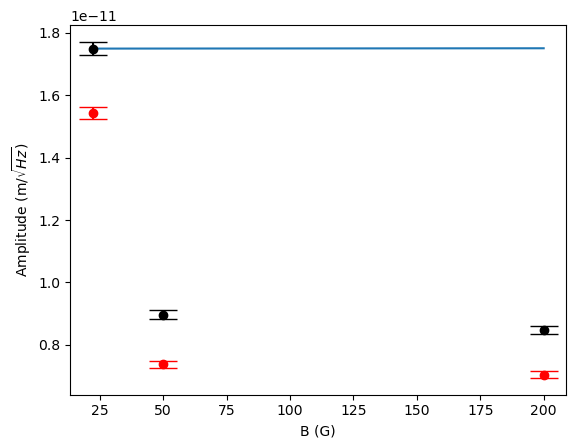

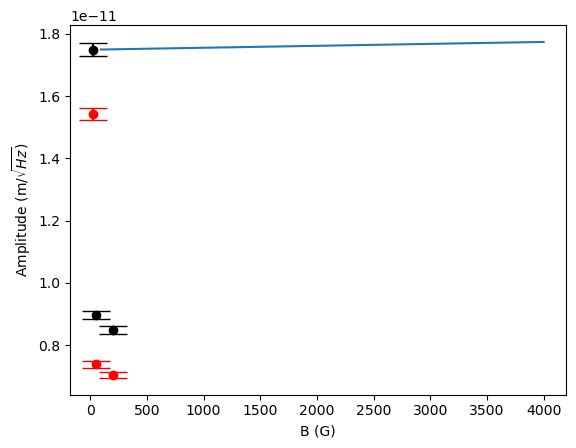

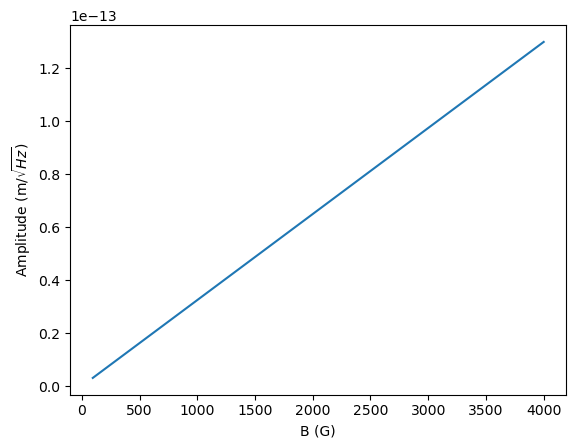

In [25]:
B = 200*np.array([1, (8/16)**2, (8/24)**2])
B2 = 200*np.linspace(1, (8/24)**2, 1000)

m1 = np.array([amp_mean1, amp_mean2, amp_mean3])
s1 = np.array([amp_std1, amp_std2, amp_std3])

m2 = np.array([amp_mean12, amp_mean22, amp_mean32])
s2 = np.array([amp_std12, amp_std22, amp_std32])

plt.errorbar(B, m1*np.sqrt(10), yerr = s1*np.sqrt(10), color = 'k', marker = 'o', linestyle = 'None', capsize = 10, label = 'Uncorrected')
plt.errorbar(B, m2*np.sqrt(10), yerr = s2*np.sqrt(10), color = 'r', marker = 'o', linestyle = 'None', capsize = 10, label = 'Corrected')
plt.plot(B2, amp_mean3*np.sqrt(10)+B2*1.2*10**(-14)/200)
plt.xlabel('B (G)')
plt.ylabel('Amplitude (m/$\sqrt{Hz}$)')

B3 = 4000*np.linspace(1, (3.7/24)**2, 1000)

plt.figure()
plt.errorbar(B, m1*np.sqrt(10), yerr = s1*np.sqrt(10), color = 'k', marker = 'o', linestyle = 'None', capsize = 10, label = 'Uncorrected')
plt.errorbar(B, m2*np.sqrt(10), yerr = s2*np.sqrt(10), color = 'r', marker = 'o', linestyle = 'None', capsize = 10, label = 'Corrected')
plt.plot(B3, amp_mean3*np.sqrt(10)+B3*2.5*10**(-13)/4000)
plt.xlabel('B (G)')
plt.ylabel('Amplitude (m/$\sqrt{Hz}$)')

plt.figure()
plt.plot(B3, B3*1.3*10**(-13)/4000)
plt.xlabel('B (G)')
plt.ylabel('Amplitude (m/$\sqrt{Hz}$)')

In [17]:
phase_rs = phases_pos[:,:, 0, 0].reshape((20000))
phase_rs2 = phases_pos[:,:, 1, 0].reshape((20000))
phase_rs3 = phases_pos[:,:, 2, 0].reshape((20000))

In [18]:
lb = 10000
ub = -1
print(np.mean(phase_rs[lb:ub]), np.std(phase_rs[lb:ub])/np.sqrt(len(phase_rs[lb:ub])))
print(np.mean(phase_rs2[lb:ub]), np.std(phase_rs2[lb:ub])/np.sqrt(len(phase_rs2[lb:ub])))
print(np.mean(phase_rs3[lb:ub]), np.std(phase_rs3[lb:ub])/np.sqrt(len(phase_rs3[lb:ub])))

-2.466074905201818 8.655084590072206e-05
-2.4692619476495405 0.00014688001762055213
-2.4680545327972485 0.00010621425345341838


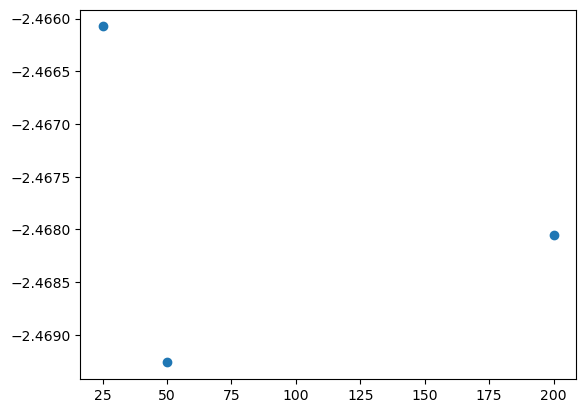

In [19]:
plt.plot([25, 50, 200], [-2.466074905201818, -2.4692619476495405, -2.4680545327972485], 'o')

### Try figuring out why phase measurement isn't working in some places

In [137]:
filename = r'D:\Lab Data\lorentz_force\sphere20250507\20250528\2.5 V\pos0 20\tt0.hdf5'
data, attrs = au.load_data_lf(filename)
PSD = scisig.welch(data['channel_d'][:10**7], fs = 1/attrs['delta_t'], nperseg = int(10/attrs['delta_t']))
PSD_drive = scisig.welch(data['channel_g'][:10**7], fs = 1/attrs['delta_t'], nperseg = int(10/attrs['delta_t']))
fft = np.fft.rfft(data['channel_d'][:10**5])
fft_drive = np.fft.rfft(data['channel_g'][:10**5])

In [157]:
filename = r'D:\Lab Data\lorentz_force\sphere20250507\20250528\2.5 V\pos0 11\tt1.hdf5'
data, attrs = au.load_data_lf(filename)
PSD2 = scisig.welch(data['channel_d'][:10**7], fs = 1/attrs['delta_t'], nperseg = int(10/attrs['delta_t']))
fft2 = np.fft.rfft(data['channel_d'][:10**5])
fft_drive2 = np.fft.rfft(data['channel_g'][:10**5])

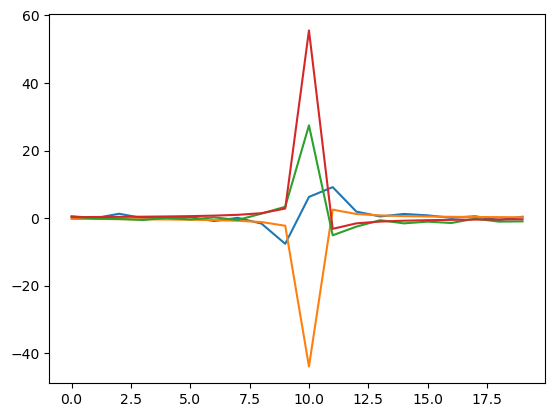

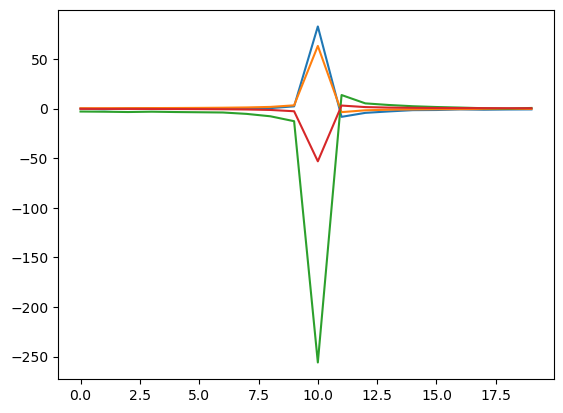

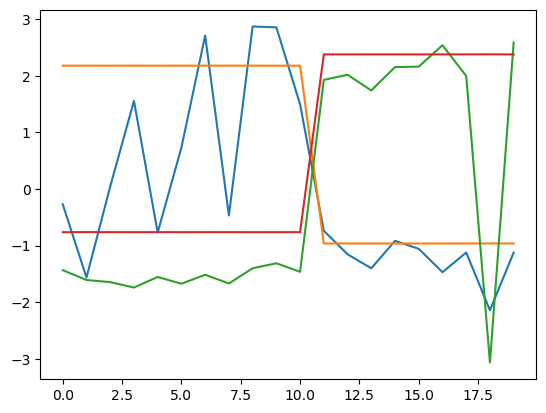

In [ ]:
lb = 5490
ub = 5510

plt.plot(np.real(fft)[lb:ub])
plt.plot(np.real(fft_drive)[lb:ub]/1000)
plt.plot(np.real(fft2)[lb:ub])
plt.plot(np.real(fft_drive2)[lb:ub]/1000)

plt.figure()
plt.plot(np.imag(fft)[lb:ub])
plt.plot(np.imag(fft_drive)[lb:ub]/1000)
plt.plot(np.imag(fft2)[lb:ub])
plt.plot(np.imag(fft_drive2)[lb:ub]/1000)

plt.figure()
plt.plot([cmath.phase(i) for i in fft[lb:ub]])
plt.plot([cmath.phase(i) for i in fft_drive[lb:ub]])


plt.plot([cmath.phase(i) for i in fft2[lb:ub]])
plt.plot([cmath.phase(i) for i in fft_drive2[lb:ub]])


In [138]:
d_filt = au.butter_bandpass_filter(data['channel_d'], 54999, 55001, fs = 1/attrs['delta_t'], order = 2)

In [139]:
PSD_filt = scisig.welch(d_filt[:10**7], fs = 1/attrs['delta_t'], nperseg = int(10/attrs['delta_t']))

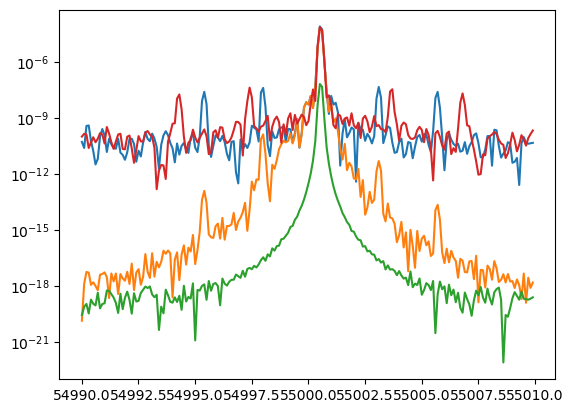

In [140]:
lb = 549900
ub = 550100
plt.plot(PSD[0][lb:ub], PSD[1][lb:ub])
plt.plot(PSD_filt[0][lb:ub], PSD_filt[1][lb:ub])
plt.plot(PSD_drive[0][lb:ub], PSD_drive[1][lb:ub]/10**8)
plt.plot(PSD[0][lb:ub], PSD2[1][lb:ub])
plt.yscale('log')

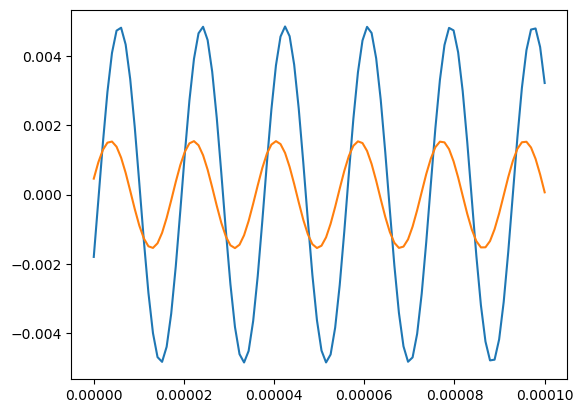

In [147]:
s = 10**6*8
l = 100
time = np.linspace(0, l/10**6, l)
plt.plot(time, d_filt[10**6+s:10**6+l+s])
plt.plot(time, data['channel_g'][10**6+s:10**6+l+s]/1000)

Text(0.5, 0, 'Time (s)')

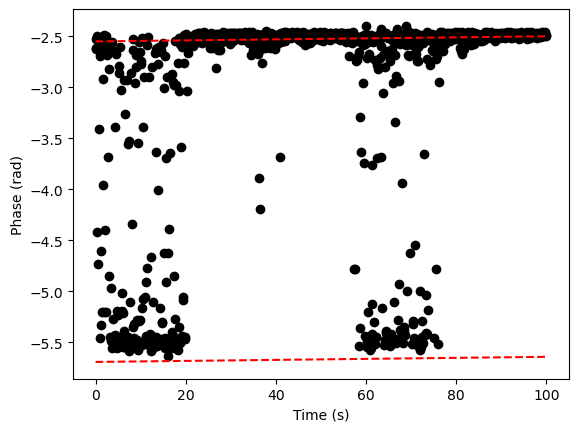

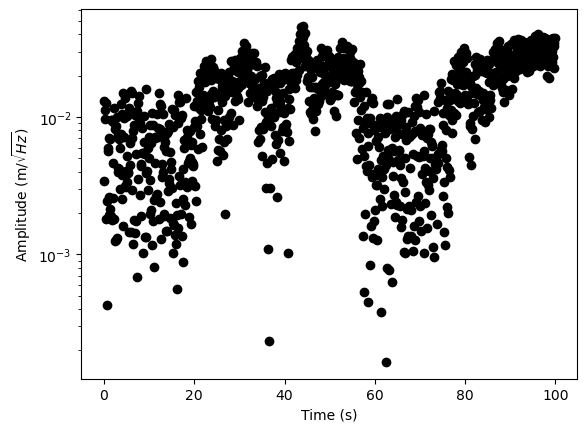

In [150]:
plt.figure()
plt.plot(np.linspace(0, 99.9, 1000), phases_pos[:,:, 0, 0].reshape((20, 1000)[:])[0], 'ko')
plt.plot([0, 100], [-2.55, -2.5], 'r--')
plt.plot([0, 100], [-2.55-np.pi, -2.5-np.pi], 'r--')
plt.ylabel('Phase (rad)')
plt.xlabel('Time (s)')
plt.figure()
plt.plot(np.linspace(0, 99.9, 1000), amps_pos[:,:, 0, 0].reshape((20, 1000)[:])[0], 'ko')
plt.ylabel('Amplitude (m/$\sqrt{Hz}$)')
plt.yscale('log')
plt.xlabel('Time (s)')

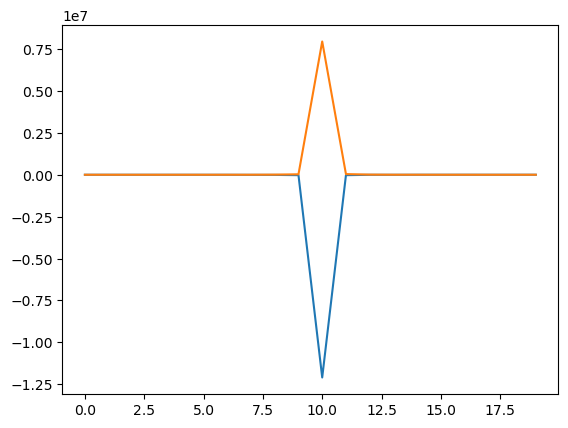

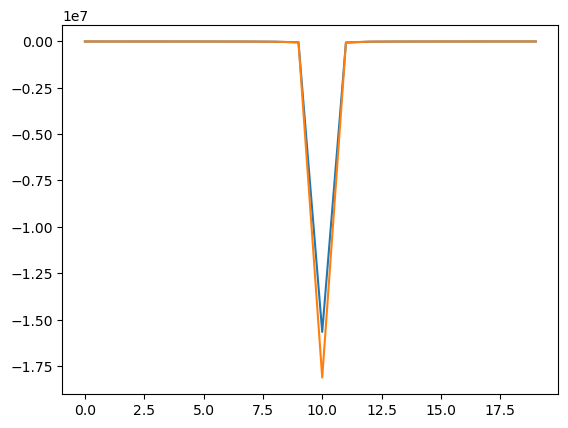

In [176]:
lb = 5490
ub = 5510
plt.plot(np.real(fft2[lb:ub]*fft_drive2[lb:ub]))
plt.plot(np.real(fft2[lb:ub]*fft_drive2[lb:ub]*np.exp((-0.5+np.pi/2)*1j)))
plt.figure()

plt.plot(np.imag(fft2[lb:ub]*fft_drive2[lb:ub]))
plt.plot(np.imag(fft2[lb:ub]*fft_drive2[lb:ub]*np.exp((-0.5+np.pi/2)*1j)))

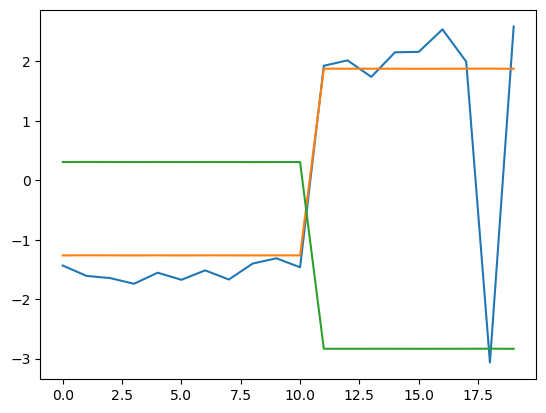

In [173]:
lb = 5490
ub = 5510
plt.figure()
plt.plot([cmath.phase(i) for i in fft2[lb:ub]])
plt.plot([cmath.phase(i) for i in fft_drive2[lb:ub]*np.exp(-0.5*1j)])
plt.plot([cmath.phase(i) for i in fft_drive2[lb:ub]*np.exp((-0.5+np.pi/2)*1j)])

In [5]:
def lockin_ext_signal(data, ext_sig, phase, fs, demod_freq, BW_pre, BW, BW2, mode):
    time = np.array(range(len(data)))/fs
    if phase == 0:
        demod = ext_sig
        esfft = np.fft.rfft(ext_sig)
        esfft_phaseshift = np.exp(np.pi/2*1j)*esfft
        demod2 = np.fft.irfft(esfft_phaseshift)
    else:
        esfft = np.fft.rfft(ext_sig)
        esfft_phaseshift = np.exp((phase)*1j)*esfft
        demod = np.fft.irfft(esfft_phaseshift)
        esfft_phaseshift = np.exp((np.pi/2+phase)*1j)*esfft
        demod2 = np.fft.irfft(esfft_phaseshift)
    if BW_pre != 0:
            data = au.butter_bandpass_filter(data, demod_freq - BW_pre, demod_freq + BW_pre, fs, order = 3)
    X_tt = data*demod
    Y_tt = data*demod2
    X_tt_filt = au.butter_lowpass_filter(X_tt, BW, fs, order = 3)
    Y_tt_filt = au.butter_lowpass_filter(Y_tt, BW, fs, order = 3)
    if mode == 'XY':
        return time, X_tt_filt, Y_tt_filt
    elif mode == 'R':
        R2 = X_tt_filt**2 + Y_tt_filt**2
        theta = np.unwrap(-2*np.arctan(X_tt_filt[1:]/Y_tt_filt[1:]))/2
        R2_filt = au.butter_lowpass_filter(R2, BW2, fs, order = 2)
        theta_filt = au.butter_lowpass_filter(theta, BW2, fs, order = 2)
        return time, R2, theta, R2_filt, theta_filt
    else:
        return 0

In [56]:
filename = r'D:\Lab Data\lorentz_force\sphere20250507\20250528\2.5 V\pos0 10\tt0.hdf5'
data, attrs = au.load_data_lf(filename)
PSD = scisig.welch(data['channel_d'][:10**7], fs = 1/attrs['delta_t'], nperseg = int(10/attrs['delta_t']))
PSD_drive = scisig.welch(data['channel_g'][:10**7], fs = 1/attrs['delta_t'], nperseg = int(10/attrs['delta_t']))
fft = np.fft.rfft(data['channel_d'][:10**5])
fft_drive = np.fft.rfft(data['channel_g'][:10**5])
d_filt = au.butter_bandpass_filter(data['channel_d'], 54999, 55001, fs = 1/attrs['delta_t'], order = 2)

In [57]:
esfft = np.fft.rfft(data['channel_g'][:])*np.exp((np.pi/2+-0.67)*1j)
excess_signal = np.fft.irfft(esfft)*0.00001

In [58]:
print(np.sqrt(np.var(excess_signal)))
print(np.sqrt(np.var(d_filt)))

1.093123913813827e-05
0.0001874480176185149


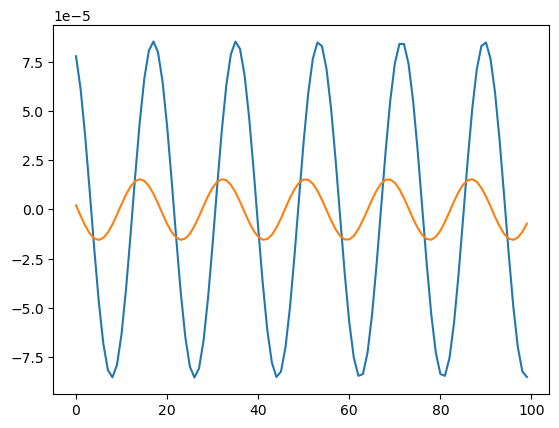

In [66]:
plt.plot(d_filt[10**6:10**6+100])
plt.plot(excess_signal[10**6:10**6+100])

In [63]:
time, X, Y = lockin_ext_signal(d_filt+excess_signal, data['channel_g'], phase = -0.67, fs = 1/attrs['delta_t'], demod_freq = 55000, BW_pre = 0, BW = 10, BW2 = 10, mode = 'XY')

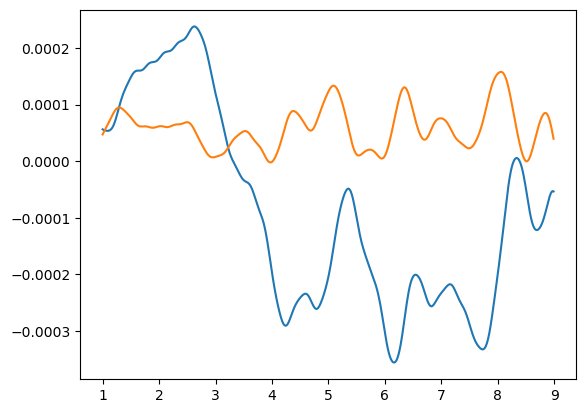

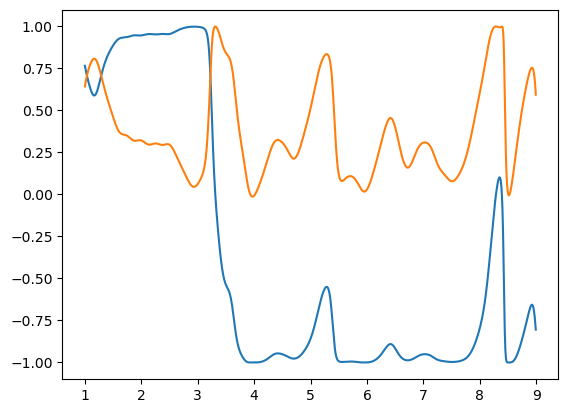

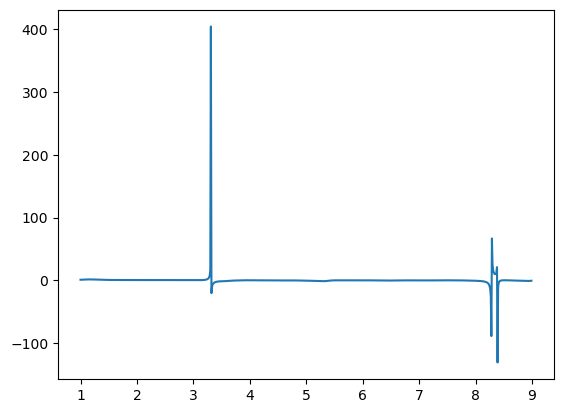

In [64]:
lb = 10**6
ub = 9*10**6
s = 10**4

plt.plot(time[lb:ub:s], X[lb:ub:s])
plt.plot(time[lb:ub:s], Y[lb:ub:s])
plt.figure()
plt.plot(time[lb:ub:s], X[lb:ub:s]/np.sqrt(X[lb:ub:s]**2 + Y[lb:ub:s]**2))
plt.plot(time[lb:ub:s], Y[lb:ub:s]/np.sqrt(X[lb:ub:s]**2 + Y[lb:ub:s]**2))
plt.figure()
plt.plot(time[lb:ub:s], Y[lb:ub:s]/X[lb:ub:s])